<a href="https://colab.research.google.com/github/raimadb/M.Tech/blob/main/Appendix_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A= [[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-2.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.]]
B= [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
X= [[-0.]
 [ 0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [ 0.]]

A= [[ 1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [-1.55  1.4   0.15  0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.6  -1.3   0.6   0.1   0.    0.    0.    0.    0.    0.    0. 

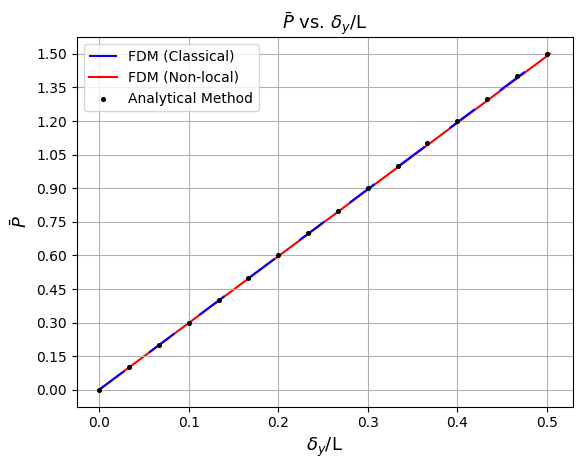

In [1]:
#Appendix B
#with varying P_bar and last max.deflection
#P_bar=(P*L**2)/(E*I)

from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

n = 10  # Last node i=n, so number of nodes,m=n+1. we have and i=n+1 is the extra variable. #Note that i and m are not the same thing.
delta_h_bar = 1 / n  # Distance between each node or interval in m
P_bar_values = np.round(np.arange(0, 1.501, 0.1), 2)

# Lists to store results for each P_bar value
last_y1_values = []
last_y2_values = []
last_y_values = []

def solve_equation(alfa, beta, P_bar):
 A1=np.zeros([n+2,n+2])


 A1[0,0]=1


 A1[1,0]=-2*alfa+(beta/2)
 A1[1,1]=2*alfa-2*beta
 A1[1,2]=3*beta/2


 A1[2,0]=alfa-2*beta
 A1[2,1]=-(2*alfa-3*beta)
 A1[2,2]=alfa-2*beta
 A1[2,3]=beta


 for i in range(3,n+1): #i=2 to i=n


  A1[i,i-3]=beta
  A1[i,i-2]=alfa-2*beta
  A1[i,i-1]=-(2*alfa-2*beta)
  A1[i,i]=alfa-2*beta
  A1[i,i+1]=beta


 A1[n+1,n-2]=3*beta/2
 A1[n+1,n-1]=alfa-5*beta/2
 A1[n+1,n]=-(2*alfa-(beta/2))
 A1[n+1,n+1]=alfa+(beta/2)


 B1=np.zeros([n+2,1])


 B1[0,0]=0
 B1[1,0]=(P_bar*(delta_h_bar**2))*(1-0)


 for j in range(2,n+1):
  B1[j,0]=P_bar*(delta_h_bar**2)*(1-((j-1)*delta_h_bar))


 B1[n+1,0]=0


 X1=linalg.solve(A1,B1)


 print("A=",A1)
 print("B=",B1)
 print("X=",X1)
 print()

 return X1

for P_bar in P_bar_values:
    classical_solution = solve_equation(alfa=1, beta=0.0, P_bar=P_bar)
    non_local_solution = solve_equation(alfa=0.8, beta=0.1, P_bar=P_bar)
    x = np.linspace(0, 1, n + 1)
    analytical_solution = (P_bar / 2) * (x ** 2 - (x ** 3) / 3)

    last_y1_values.append(classical_solution[:-1][-1])
    last_y2_values.append(non_local_solution[:-1][-1])
    last_y_values.append(analytical_solution[-1])

last_y1_values = np.array(last_y1_values)
last_y2_values = np.array(last_y2_values)
last_y_values = np.array(last_y_values)


#table
combined_results = list(zip(P_bar_values,last_y_values,last_y1_values,last_y2_values))
csv_file_path = 'small deflection,P_bar,a=0.8,n=10.csv'
with open(csv_file_path, mode='w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['P_bar',
                         'Classical(Analytical)',
                         'Classical (FDM)',
                         'Non-local (FDM)'])
    csv_writer.writerows(combined_results)


plt.figure()
y=np.linspace(0,1.5,11)
plt.yticks(y)
plt.plot(last_y1_values, P_bar_values, color='blue', linestyle='--', dashes=(15, 15),
         linewidth=1.5, zorder=2, label='FDM (Classical)')
plt.plot(last_y2_values, P_bar_values, color='red', linewidth=1.5, zorder=1, label='FDM (Non-local)')
plt.scatter(last_y_values, P_bar_values, color='black', s=7, zorder=3, label='Analytical Method')
plt.xlabel(r'$\delta_y$/L', fontsize=13)
plt.ylabel(r'$\bar{P}$', fontsize=13)
plt.title(r'$\bar{P}$ vs. $\delta_y$/L', fontsize=13)
plt.grid(True)
plt.legend()
plt.savefig('P_bar_vs_y.pdf')
plt.show()
